# Notebook for extracting training curves of baseline sims for project write-up
* Mon 13-Aug-18
* Copy of training_monitor_dev_20180702
* Aim is simply to extract the training curves for VCTK-US-22 and VCTK-All-107

### Basic code for monitoring training curves
* Built a simple TrainingMonitor class in training_monitor.py
* It's a basic interface for writing and reading training loss stats as the simulation progresses
* Data is represented in Pandas DataFrames, and for now is stored on the disk as csv files
* I may turn this into a SQLLite database at some point because it's more flexible. However, this means you'll no longer just be able to read the files by eye or with very simple code. Will think about whether it's worth it.


TODO
* Additional functions for visualising and analysing the curves
* Simple notebook to do this
* At some point, will also want an interactive tool?
* Add in additional metrics:
    * Training loss as well as validation?
    * Loss breakdowns (by feature, time etc.)
    * Attention?
    * MCD
    * ASR metrics
    
    
** UPDATE 18-Jul-18 **
* Yesterday I 'finished' my work on the training monitor in the master branch
* I checked in all my code and merged the changes into the fader-networks branch, ready for my experiments there
* Finally, I'm tidying up this notebook ready for archiving
* note: this notebook runs in the master branch!
* Best start [here](#bigrun)

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# needs to run in the master branch
# (that's also where all the checkpoints are)
os.chdir('/home/ubuntu/msc-project-master/msc-project-master/')

In [3]:
os.getcwd()

'/home/ubuntu/msc-project-master/msc-project-master'

In [5]:
import training_monitor as tm

# Mon 13-Aug-18: Code for write-up is here

**TODO List**
* VCTK-US-22
    * Rerun the whole baseline sim with all checkpoints saved
    * Rerun with eval_curves to get the plots
* VCTK-All-107
    * Run with TeacherForcing=True, Noise=0
    * Put the plots in this notebook

In [13]:
save_folder = '/home/ubuntu/msc-project-master/msc-project-master/docs/master/baseline_training_curves'

## 1) VCTK-US-22
* I think I need to completely re-run this - it's all a bit of a mess. Won't take too long to run, can do it at a later date
* Then need to build the eval_curves on it
* Tue 14-Aug am: sims are running through. In line with original sims. Will now keep training to end, and then can do final plots and add to doc

In [13]:
tm_vctk_22 = tm.TrainingMonitor('vctk-us-train-mon.csv', 
                                        exp_name='vctk-us-train-mon', 
                                        path="training_logs")#,
                                       # source_file=('vctk_all_20180716_teachT_noiseT.csv', 'vctk_all_2_v2_20180716_teachT_noiseT.csv'))

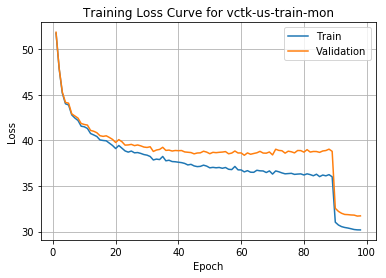

In [14]:
tm_vctk_22.plot_loss()

In [44]:
tm_vctk_22_new = tm.TrainingMonitor('vctk-us-22-baseline-combo.csv', exp_name='vctk-us-22-baseline-combo', path="training_logs",
                                        source_file=('vctk-us-22-baseline.csv', 'vctk-us-22-baseline-noise-2.csv'))
tm_vctk_22_new.read()

In [45]:
tm_vctk_22_new.disp()

,epoch,mcd,train_loss,update_time,valid_loss
0,1,NaN,51.715108,13-Aug-2018 21:31:11,51.832813
1,2,NaN,47.437942,13-Aug-2018 21:36:28,47.545621
2,3,NaN,45.280520,13-Aug-2018 21:41:46,45.581989
3,4,NaN,44.243229,13-Aug-2018 21:47:09,44.304481
4,5,NaN,43.210531,13-Aug-2018 21:52:47,43.404007
5,6,NaN,43.276599,13-Aug-2018 21:58:24,43.269236
6,7,NaN,42.799890,13-Aug-2018 22:04:02,42.692677
7,8,NaN,41.819688,13-Aug-2018 22:09:34,42.029969
8,9,NaN,41.571112,13-Aug-2018 22:15:01,41.965612
9,10,NaN,41.210311,13-Aug-2018 22:20:23,41.691806


In [46]:
tm_vctk_22_new.data['valid_loss'].min()

31.581955649600001

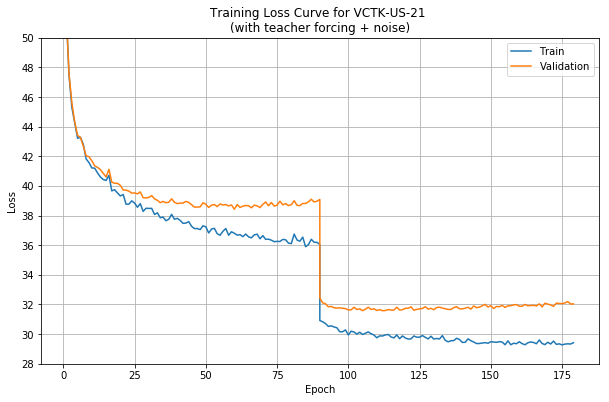

In [49]:
f = plt.figure(figsize=(10,6))
tm_vctk_22_new.plot_loss(ax=f.gca())
plt.title('Training Loss Curve for VCTK-US-21 \n(with teacher forcing + noise)')
plt.ylim([28, 50])
plt.yticks(range(28, 52, 2))
plt.savefig(os.path.join(save_folder, 'training_curves_TT_vctk_us_21'))
plt.show()

In [48]:
tm_vctk_22_new.data['valid_loss'].min()

31.581955649600001

### Reload from eval_curves
* tm_recalc_combo_TT: results are in line with the tm_vctk_22_new results above (just sampling differences I guess)
* the speaker recognition results are just silly - goes straight to 100%!

In [37]:
tm_recalc_combo_TT_us = tm.TrainingMonitor('vctk_us_20180814_write_up_teachT_noiseT.csv', exp_name='VCTK-US-22', path="training_logs",
                                        source_file=('vctk_us_20180814_write_up_teachT_noiseT.csv', 'vctk_us_noise_2_20180814_write_up_teachT_noiseT.csv'))

In [38]:
tm_recalc_combo_TT_us.disp()

,epoch,mcd,speaker_recognition_acc_eval,train_loss,update_time,valid_loss
0,1.0,NaN,1.000000,51.703549,14-Aug-2018 15:10:12,51.824628
1,2.0,NaN,1.000000,47.447604,14-Aug-2018 15:10:34,47.556919
2,3.0,NaN,1.000000,45.600742,14-Aug-2018 15:10:56,45.614323
3,4.0,NaN,1.000000,44.007944,14-Aug-2018 15:11:18,44.267334
4,5.0,NaN,1.000000,43.122011,14-Aug-2018 15:11:39,43.439958
5,6.0,NaN,1.000000,43.000318,14-Aug-2018 15:12:00,43.253539
6,7.0,NaN,0.997089,42.423121,14-Aug-2018 15:12:22,42.698610
7,8.0,NaN,1.000000,41.961020,14-Aug-2018 15:12:44,42.068506
8,9.0,NaN,1.000000,41.756025,14-Aug-2018 15:13:05,41.982160
9,10.0,7.255342,1.000000,41.374818,14-Aug-2018 15:13:50,41.690095


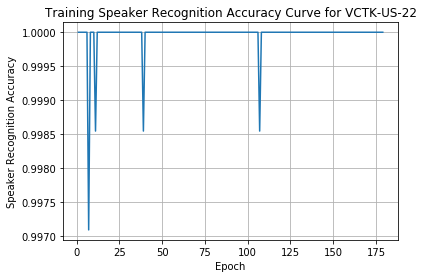

In [70]:
tm_recalc_combo_TT_us.plot_speaker_recognition()

#### With without teacher forcing
* now running without teaching forcing in the hope of getting sensible speaker recognition curves!
* also need them for one of the training plots I think

In [40]:
tm_recalc_combo_FF_us = tm.TrainingMonitor('vctk_us_20180814_write_up_teachF_noiseF.csv', exp_name='VCTK-US-22', path="training_logs",
                                        source_file=('vctk_us_20180814_write_up_teachF_noiseF.csv', 'vctk_us_noise_2_20180814_write_up_teachF_noiseF.csv'))

In [41]:
tm_recalc_combo_FF_us.disp()

,epoch,mcd,speaker_recognition_acc_eval,train_loss,update_time,valid_loss
0,1.0,NaN,1.000000,60.106924,14-Aug-2018 17:02:07,59.799509
1,2.0,NaN,0.893741,66.779902,14-Aug-2018 17:02:29,67.085228
2,3.0,NaN,0.950509,68.224050,14-Aug-2018 17:02:50,67.907458
3,4.0,NaN,0.963610,69.018100,14-Aug-2018 17:03:11,69.189017
4,5.0,NaN,0.844250,69.767446,14-Aug-2018 17:03:32,69.648160
5,6.0,NaN,0.842795,86.625028,14-Aug-2018 17:03:53,86.825944
6,7.0,NaN,0.807860,95.008707,14-Aug-2018 17:04:14,96.201432
7,8.0,NaN,0.886463,89.898441,14-Aug-2018 17:04:35,86.925471
8,9.0,NaN,0.828239,75.465313,14-Aug-2018 17:04:55,76.969738
9,10.0,18.160645,0.820961,76.895413,14-Aug-2018 17:05:40,77.884018


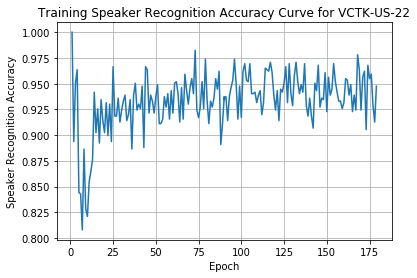

In [42]:
tm_recalc_combo_FF_us.plot_speaker_recognition()

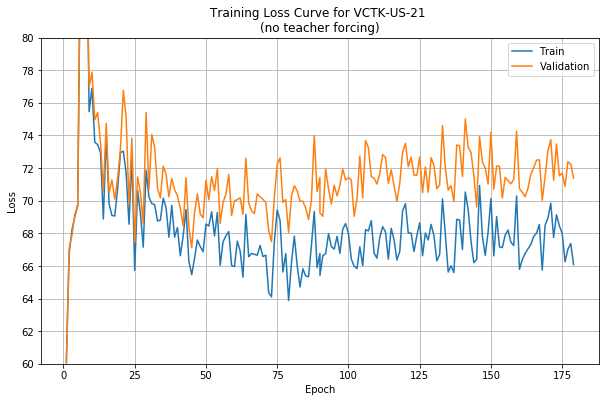

In [50]:
f = plt.figure(figsize=(10,6))
tm_recalc_combo_FF_us.plot_loss(ax=f.gca())
plt.title('Training Loss Curve for VCTK-US-21 \n(no teacher forcing)')
plt.ylim([60, 80])
plt.yticks(range(60, 82, 2))
plt.savefig(os.path.join(save_folder, 'training_curves_FF_vctk_us_21'))
plt.show()

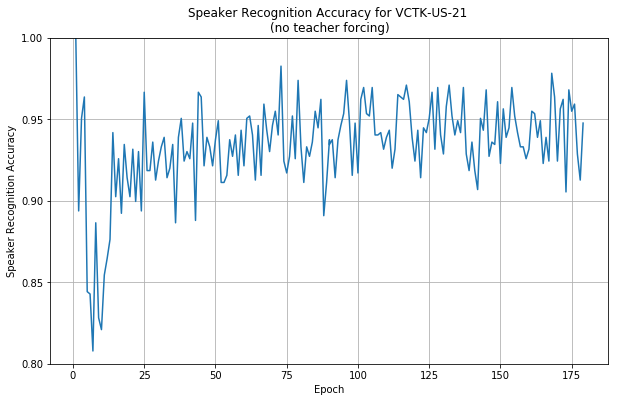

In [67]:
f = plt.figure(figsize=(10,6))
tm_recalc_combo_FF_us.plot_speaker_recognition(ax=f.gca())
plt.title('Speaker Recognition Accuracy for VCTK-US-21 \n(no teacher forcing)')
plt.ylim([0.80, 1.00])
plt.yticks([r/100.0 for r in range(80, 105, 5)])
plt.savefig(os.path.join(save_folder, 'speaker_recognition_FF_vctk_us_21'))
plt.show()

In [ ]:
# TODO
# Check the training curves are in line with what we got when running the sims
# plot the speaker recognition...
# run with FF, hope it doesn't give 100% immediately! (this is the one we plot)

## 2) VCTK-All-107

### Teacher forcing = True, noise = True
* i.e. show the loss as it appears during the training stages

In [51]:
tm_recalc_combo_TT = tm.TrainingMonitor('vctk_all_2_v2_20180716_teachT_noiseT.csv', exp_name='VCTK-All-107', path="training_logs",
                                        source_file=('vctk_all_20180716_teachT_noiseT.csv', 'vctk_all_2_v2_20180716_teachT_noiseT.csv'))

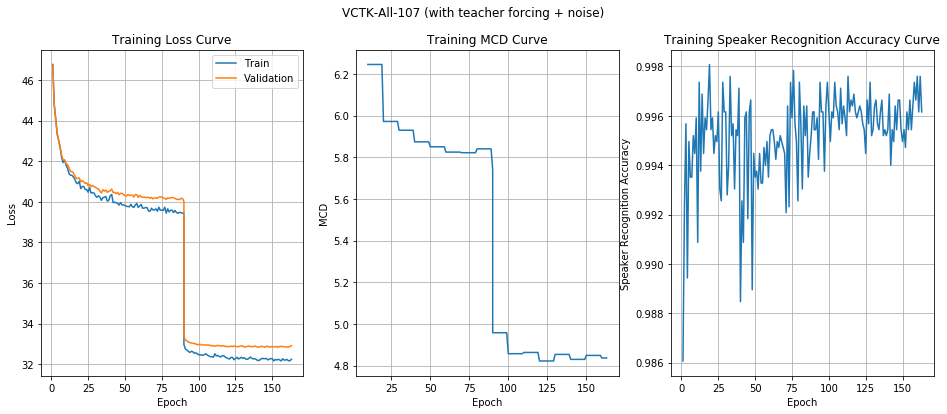

In [15]:
tm_recalc_combo_TT.exp_name = 'VCTK-All-107 (with teacher forcing + noise)'
tm_recalc_combo_TT.plot(fname=os.path.join(save_folder, 'all_eval_curves_TT_vctk_all_107'))
plt.show()

In [16]:
# Just show the loss plot
# Also create the speaker accuracy plot for later section
# Do with noise=2 as well

In [56]:
tm_recalc_combo_TT.data['valid_loss'].min()

32.8213253021

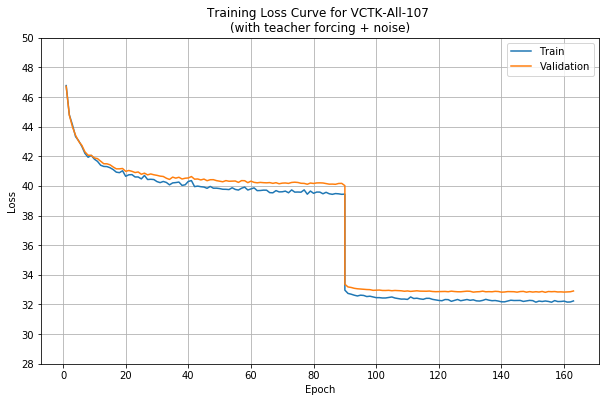

In [52]:
f = plt.figure(figsize=(10,6))
tm_recalc_combo_TT.plot_loss(ax=f.gca())
plt.title('Training Loss Curve for VCTK-All-107 \n(with teacher forcing + noise)')
plt.ylim([28, 50])
plt.yticks(range(28, 52, 2))
plt.savefig(os.path.join(save_folder, 'training_curves_TT_vctk_all_107'))
plt.show()

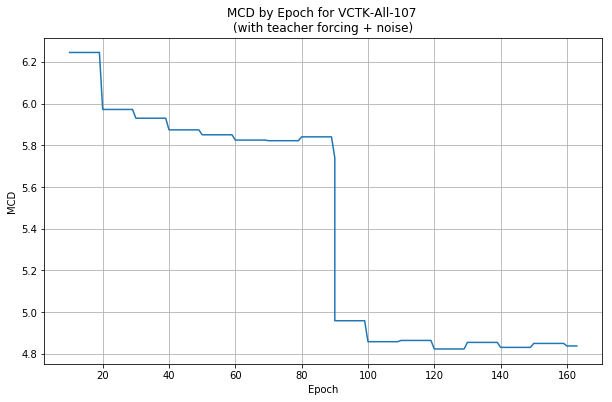

In [57]:
f = plt.figure(figsize=(10,6))
tm_recalc_combo_TT.plot_mcd(ax=f.gca())
plt.title('MCD by Epoch for VCTK-All-107 \n(with teacher forcing + noise)')
plt.savefig(os.path.join(save_folder, 'mcd_curves_TT_vctk_all_107'))
plt.show()

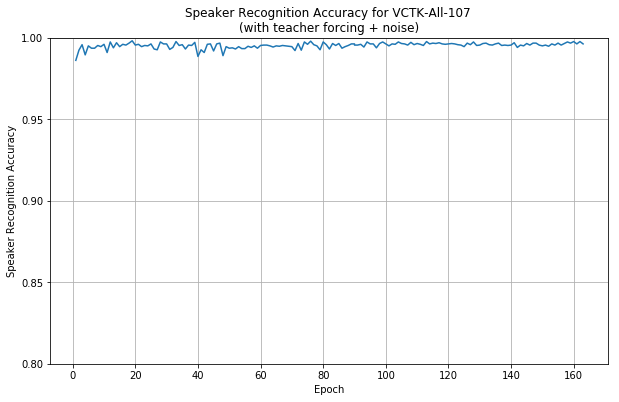

In [66]:
f = plt.figure(figsize=(10,6))
tm_recalc_combo_TT.plot_speaker_recognition(ax=f.gca())
plt.title('Speaker Recognition Accuracy for VCTK-All-107 \n(with teacher forcing + noise)')
plt.ylim([0.80, 1.00])
plt.yticks([r/100.0 for r in range(80, 105, 5)])
plt.savefig(os.path.join(save_folder, 'speaker_recognition_TT_vctk_all_107'))
plt.show()

### No teacher forcing
* i.e. as the model works during pure inference on unseen text with no forced alignment

In [53]:
# run 'free': no teacher forcing, no noise
tm_recalc_combo_FF = tm.TrainingMonitor('vctk_all_2_v2_20180716_teachF_noiseF.csv', exp_name='vctk_all_20180716_teachT_noiseT', path="training_logs",
                                        source_file=('vctk_all_20180716_teachF_noiseF.csv', 'vctk_all_2_v2_20180716_teachF_noiseF.csv'))

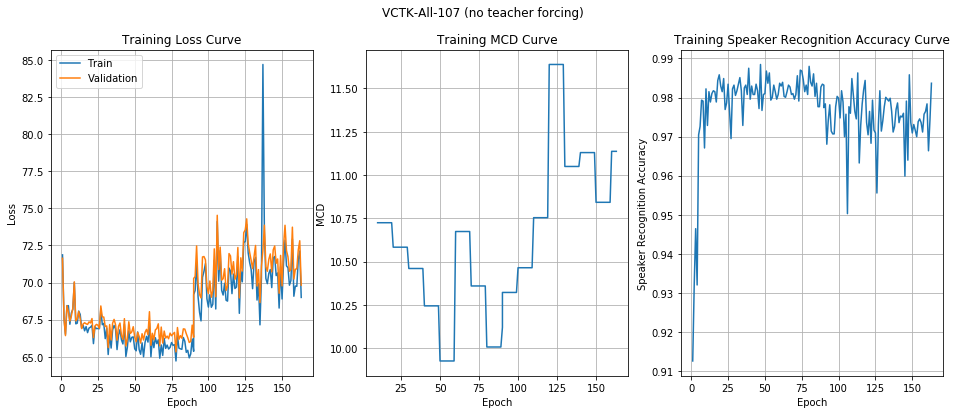

In [54]:
tm_recalc_combo_FF.exp_name = 'VCTK-All-107 (no teacher forcing)'
tm_recalc_combo_FF.plot(fname=os.path.join(save_folder, 'all_eval_curves_FF_vctk_all_107'))
plt.show()

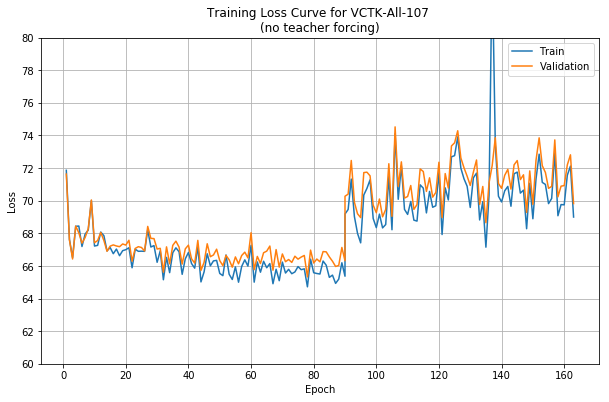

In [55]:
f = plt.figure(figsize=(10,6))
tm_recalc_combo_FF.plot_loss(ax=f.gca())
plt.title('Training Loss Curve for VCTK-All-107 \n(no teacher forcing)')
plt.ylim([60, 80])
plt.yticks(range(60, 82, 2))
plt.savefig(os.path.join(save_folder, 'training_curves_FF_vctk_all_107'))
plt.show()

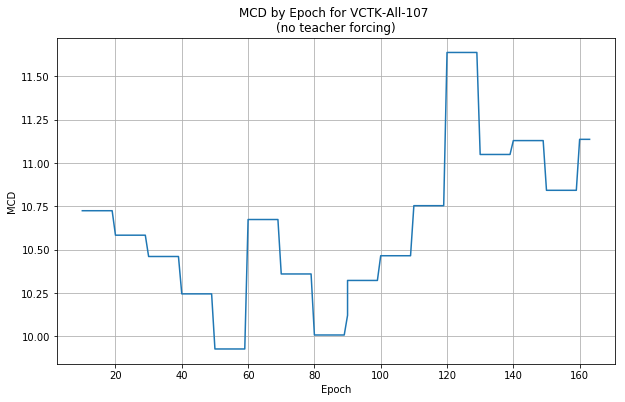

In [58]:
f = plt.figure(figsize=(10,6))
tm_recalc_combo_FF.plot_mcd(ax=f.gca())
plt.title('MCD by Epoch for VCTK-All-107 \n(no teacher forcing)')
plt.savefig(os.path.join(save_folder, 'mcd_curves_FF_vctk_all_107'))
plt.show()

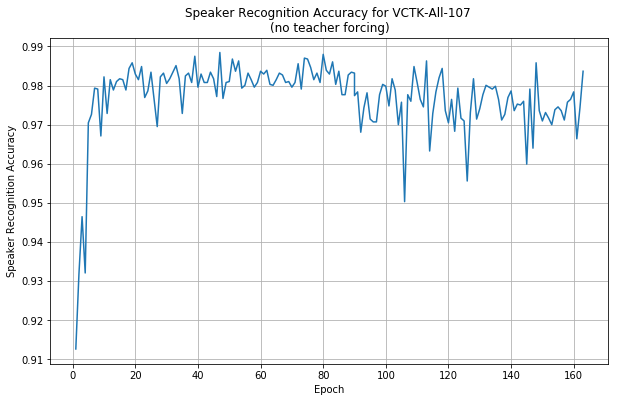

In [62]:
f = plt.figure(figsize=(10,6))
tm_recalc_combo_FF.plot_speaker_recognition(ax=f.gca())
plt.title('Speaker Recognition Accuracy for VCTK-All-107 \n(no teacher forcing)')
plt.savefig(os.path.join(save_folder, 'speaker_recognition_FF_vctk_all_107'))
plt.show()

### Teacher forcing but no noise...
* Now calculate the training curves with teacher forcing but no noise
* This is quite artificial - assuming a perfect input, how close can the model get on the next step?
* But at least this makes it easier to compare the two stages of training
* The commands are actually in the main of eval_curves.py
* That's how they were run last time - I'll do the same here for TF
* Will be running this on aws-spot-2

 ```python
python calc_eval_curves(checkpoint_folder='checkpoints/vctk-all', data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all', speaker_recognition_checkpoint='checkpoints/speaker_recognition_vctk_all/bestmodel.pth', speaker_recognition_exp_name='notebook_test', exp_name='vctk_all_TT_for_write_up_20180813', max_seq_len=1000,nspk=107,gpu=0,batch_size=64,seed=1,eval_epochs=20,b_teacher_force=True,b_use_train_noise=True,start_epoch=1,
end_epoch=90,step_epoch=5)
 ```

In [178]:
tm_recalc_combo_TF = tm.TrainingMonitor('vctk_all_20180813_write_up_teachT_noiseF.csv', exp_name='vctk_all_20180813_write_up_teachT_noiseF', path="training_logs")

In [182]:
tm_recalc_combo_TF = tm.TrainingMonitor('vctk_all_20180813_write_up_teachT_noiseF.csv', exp_name='vctk_all_20180813_write_up_teachT_noiseF', path="training_logs",
                                        source_file=('vctk_all_20180813_write_up_teachT_noiseF.csv', 'vctk_all_2_v2_20180813_write_up_teachT_noiseF.csv'))

In [184]:
#tm_recalc_combo_TF.disp()

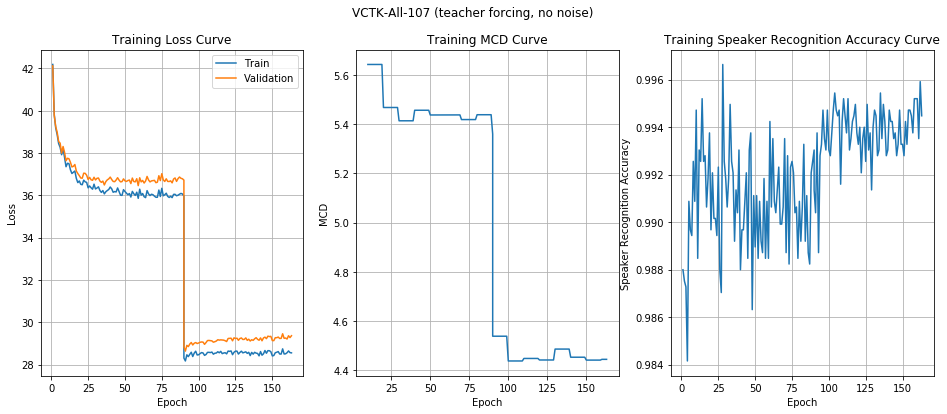

In [186]:
tm_recalc_combo_TF.exp_name = 'VCTK-All-107 (teacher forcing, no noise)'
tm_recalc_combo_TF.plot(fname=os.path.join(save_folder, 'all_eval_curves_TF_vctk_all_107'))
plt.show()

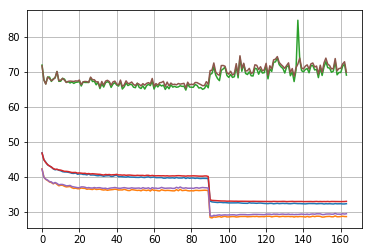

In [191]:
plt.plot(tm_recalc_combo_TT.data['train_loss'])
plt.plot(tm_recalc_combo_TF.data['train_loss'])
plt.plot(tm_recalc_combo_FF.data['train_loss'])
plt.grid(True)

plt.plot(tm_recalc_combo_TT.data['valid_loss'])
plt.plot(tm_recalc_combo_TF.data['valid_loss'])
plt.plot(tm_recalc_combo_FF.data['valid_loss'])
plt.grid(True)

### Loss by feature for write-up

In [83]:
l = tm.LossDecomposition(tm_recalc_combo_TT)

In [84]:
out = l.get_loss_by_feature()

Done 10
Done 20
Done 30
Done 40
Done 50
Done 60
Done 70
Done 80
Done 90
Done 90
Done 100
Done 110
Done 120
Done 130
Done 140
Done 150
Done 160


In [156]:
world_labels = ['mgc_'+str(i+1) for i in range(60)]
world_labels.append('vuv')
world_labels.append('lf0')
world_labels.append('bap')

In [174]:
idx_to_show = [0, 16]
l.loss_by_feature[idx_to_show, :].shape
[l.epoch_list[i] for i in idx_to_show]

[10, 160]

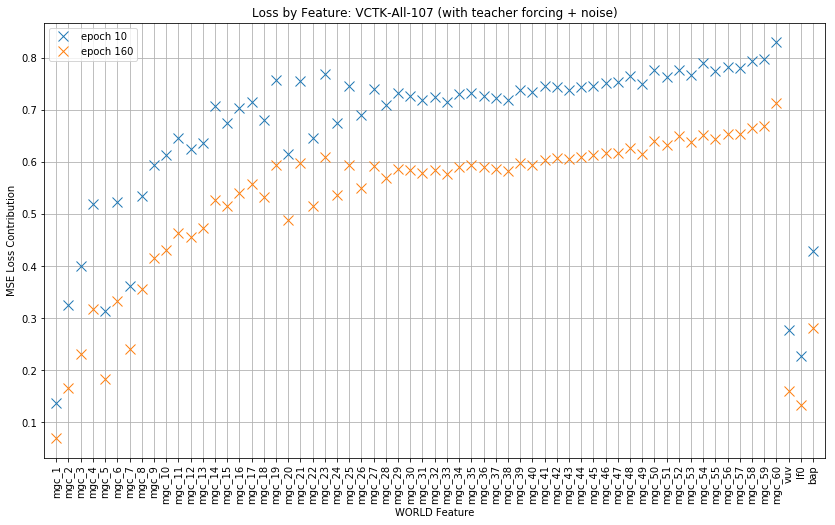

In [175]:
idx_to_show = [0, 16]


plt.figure(figsize=(14,8))
plt.plot(l.loss_by_feature[idx_to_show, :].transpose(), linestyle="None", marker="x", ms=10, mew=1)
plt.grid()
plt.legend(['epoch %d' % e for e in [l.epoch_list[i] for i in idx_to_show]])
plt.title('Loss by Feature: ' + l.training_monitor.exp_name)
plt.ylabel('MSE Loss Contribution')
plt.xlabel('WORLD Feature')
plt.gca().set_xticks(range(63))
plt.gca().set_xticklabels(world_labels, rotation=90)
plt.gca().set_xlim([-1, 63])
plt.savefig(os.path.join(save_folder, 'loss_by_feature_vctk_all_107'))
plt.show()

In [119]:
l.loss_by_feature.T.shape

(63, 17)

### ---- below here is the original notebook ----

### Initial dev

In [11]:
t = tm.TrainingMonitor('my_test.csv', exp_name='my_exp', b_append=True, path="test")

In [12]:
t

,epoch,update_time,train_loss,valid_loss


In [16]:
t.insert(5, valid_loss=5.5)
t.insert(10, valid_loss=7)
t.insert(1, valid_loss=3.8)

In [17]:
t.write()

In [18]:
t.read()
t

,epoch,update_time,train_loss,valid_loss
0,1,02-Jul-2018 16:36:10,NaN,3.8
1,5,02-Jul-2018 16:36:10,NaN,5.5
2,10,02-Jul-2018 16:36:10,NaN,7.0


### Check on training log producing by sim

In [6]:
t = tm.TrainingMonitor('vctk-us-train-mon.csv', exp_name='vctk-us-train-mon', path="training_logs")
t.read()
#t.disp()

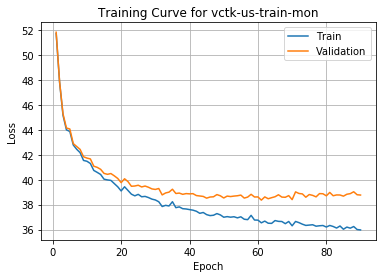

In [7]:
t.plot()

In [12]:
ls = tm.LossDecomposition(t)

In [13]:
loss_contrib = ls.get_loss_contrib(4)

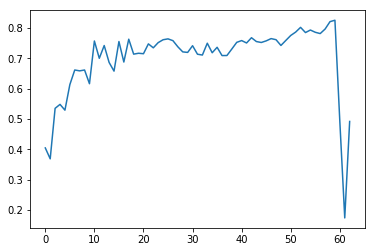

In [14]:
plt.plot(loss_contrib.sum((0,1)))

In [15]:
ls.load_all_loss_contribs()

In [16]:
loss_by_feature = ls.get_loss_by_feature()

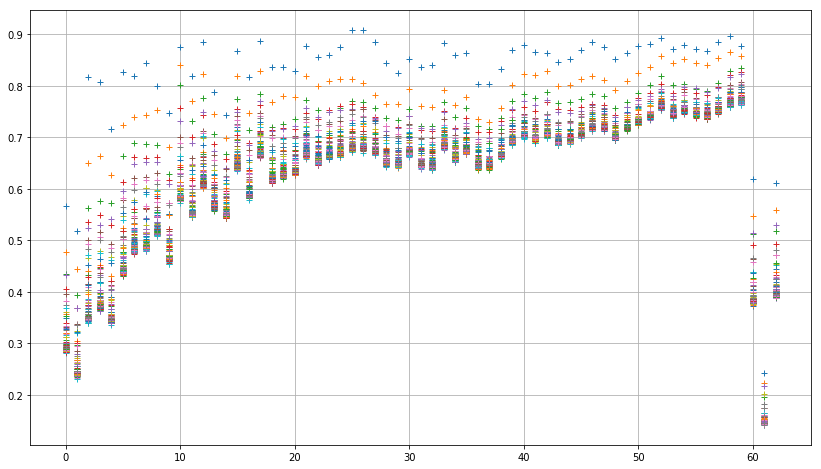

In [21]:
plt.figure(figsize=(14,8))
plt.plot(loss_by_feature.transpose(), linestyle="None", marker="+")
plt.grid(True)
#plt.legend(ls.all_loss_epochs)
plt.show()

### Phase 2

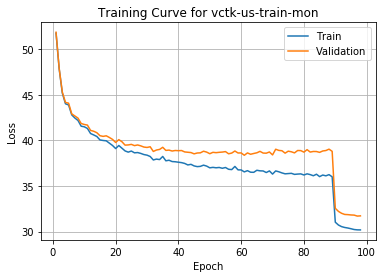

In [48]:
t = tm.TrainingMonitor('vctk-us-train-mon.csv', exp_name='vctk-us-train-mon', path="training_logs")
t.read()
t.plot()

### VCTK-all

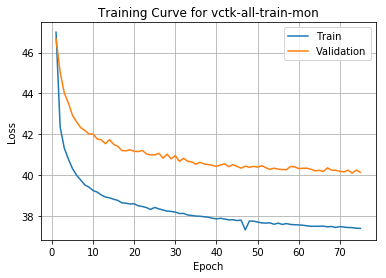

In [7]:
t = tm.TrainingMonitor('vctk-all-train-mon.csv', exp_name='vctk-all-train-mon', path="training_logs")
t.read()
t.plot()

In [43]:
ls = tm.LossDecomposition(t)

In [44]:
ls.load_all_loss_contribs()
loss_by_feature = ls.get_loss_by_feature()

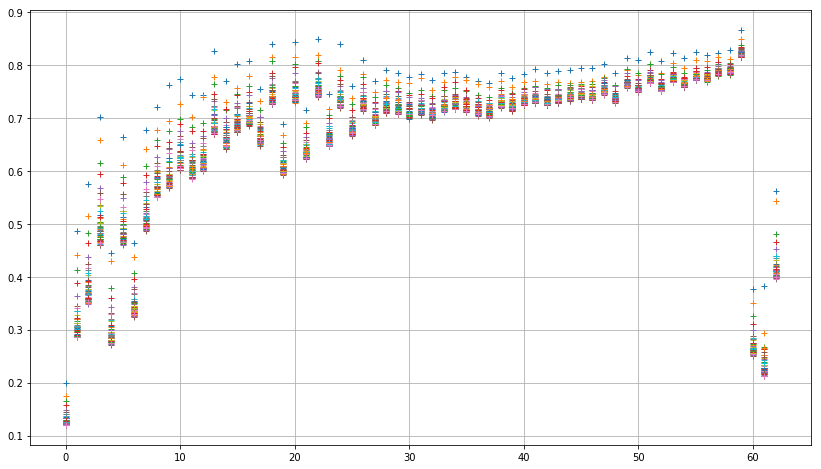

In [45]:
plt.figure(figsize=(14,8))
plt.plot(loss_by_feature.transpose(), linestyle="None", marker="+")
plt.grid(True)
#plt.legend(ls.all_loss_epochs)
plt.show()

### vctk-us-train-mon-mcd

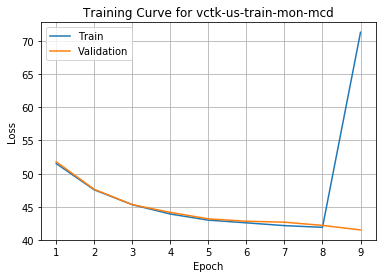

In [27]:
t = tm.TrainingMonitor('vctk-us-train-mon-mcd.csv', exp_name='vctk-us-train-mon-mcd', path="training_logs")
t.read()
t.plot()

In [28]:
t.disp()

,epoch,update_time,train_loss,valid_loss,mcd
0,1.0,05-Jul-2018 11:55:06,51.523521,51.795788,9.663568
1,2.0,05-Jul-2018 12:01:32,47.576319,47.648936,8.563579
2,3.0,05-Jul-2018 12:07:47,45.335492,45.338031,8.255662
3,4.0,05-Jul-2018 12:14:03,43.929134,44.180010,8.078120
4,5.0,05-Jul-2018 12:20:20,43.009736,43.203468,7.625696
5,6.0,05-Jul-2018 12:26:34,42.601907,42.842641,7.598790
6,7.0,05-Jul-2018 12:32:50,42.184700,42.702383,7.493384
7,8.0,05-Jul-2018 12:39:10,41.926199,42.216983,7.339984
8,9.0,05-Jul-2018 12:55:38,71.274071,41.538555,15.378649


## Big Run Over Weekend: 06-Jul-17 <a id='bigrun'></a>
* Aim to run a full, clean vctk-all sim with logged losses etc. for write-up

In [552]:
python train.py --data=/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all --nspk=107 --expName=vctk-all --noise 4 --seq-len 100 --epochs 90



SyntaxError: invalid syntax (<ipython-input-552-16f66ab93239>, line 1)

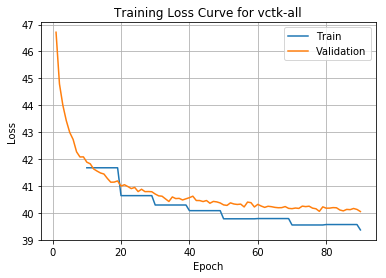

In [554]:
tm_phase_one = tm.TrainingMonitor('vctk-all.csv', exp_name='vctk-all', path="training_logs")
tm_phase_one.read()
tm_phase_one.plot_loss()

In [555]:
tm_phase_one.disp(b_show_all=True)

,epoch,update_time,train_loss,valid_loss,mcd
0,1.0,06-Jul-2018 21:48:36,NaN,46.712190,NaN
1,2.0,06-Jul-2018 22:16:47,NaN,44.789036,NaN
2,3.0,06-Jul-2018 22:44:55,NaN,43.992648,NaN
3,4.0,06-Jul-2018 23:14:12,NaN,43.424401,NaN
4,5.0,06-Jul-2018 23:42:34,NaN,42.988889,NaN
5,6.0,07-Jul-2018 00:10:55,NaN,42.725274,NaN
6,7.0,07-Jul-2018 00:38:48,NaN,42.266756,NaN
7,8.0,07-Jul-2018 01:07:30,NaN,42.075240,NaN
8,9.0,07-Jul-2018 01:36:24,NaN,42.080471,NaN
9,10.0,07-Jul-2018 02:11:03,41.674166,41.882917,6.229821


Second stage of training:

In [ ]:
python train.py --data=/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all --nspk=107 --expName=vctk-all-2 --noise 2 --seq-len 400 --epochs 90 --checkpoint checkpoints/vctk-all/bestmodel.pth

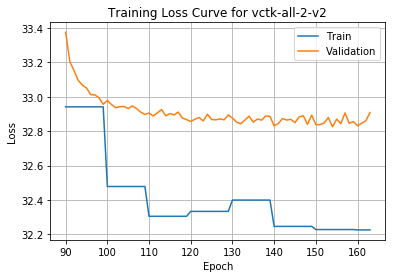

In [556]:
tm_phase_two = tm.TrainingMonitor('vctk-all-2-v2.csv', exp_name='vctk-all-2-v2', path="training_logs")
tm_phase_two.read()
tm_phase_two.plot_loss()

In [70]:
#tm_phase_two.disp(b_show_all=True)

Killed vctk-all-2-v2 at 10:03 16-Jul-18 because it had been running for ages with no improvement, and it was hogging all the memory

Now combine the two segments together...

In [557]:
tm_combo = tm_phase_one.combine(tm_phase_two, 'vctk-all-combo')

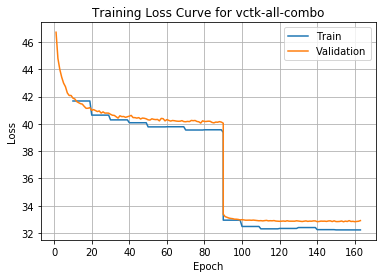

In [559]:
tm_combo.plot_loss()

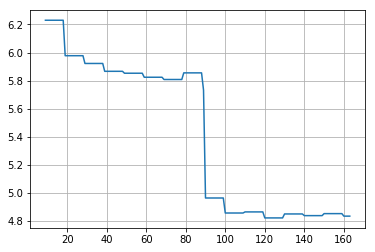

In [560]:
plt.plot(tm_combo.data['mcd'].fillna(method='ffill'))
plt.grid(True)
plt.show()

### Recomputing vctk-all using eval_curves
* when I ran the sims earlier, I saved away checkpoints every epoch
* can now use the eval_curves.py code to run back through these checkpoints and calculate more detailed evaluation metrics, which are saved in a TrainingMonitor object
* code below does exactly this...

 ```python
 calc_eval_curves(checkpoint_folder='checkpoints/vctk-all',
                     data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all',
                     speaker_recognition_checkpoint='checkpoints/speaker_recognition_vctk_all/bestmodel.pth',
                     speaker_recognition_exp_name='notebook_test',
                     exp_name='vctk_all_recompute_20180716',
                     max_seq_len=1000,
                     nspk=107,
                     gpu=0,
                     batch_size=64,
                     seed=1,
                     eval_epochs=20,
                     b_teacher_force=True,
                     b_use_train_noise=True,
                     start_epoch=1,
                     end_epoch=90,
                     step_epoch=5
                     )
 ```

Now we can load the saved TrainingMonitor results back in and look at the plots etc.

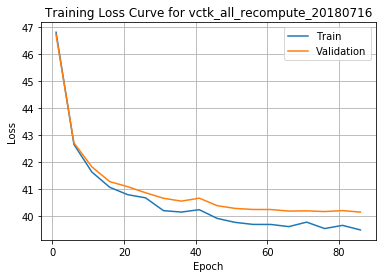

In [562]:
# TrainingMonitor for first training phase
tm_recalc_phase_one = tm.TrainingMonitor('vctk_all_recompute_20180716.csv', exp_name='vctk_all_recompute_20180716', path="training_logs")
tm_recalc_phase_one.read()
tm_recalc_phase_one.plot_loss()

In [563]:
tm_recalc_phase_one.disp()

,epoch,update_time,train_loss,valid_loss,mcd,speaker_recognition_acc_eval
0,1,16-Jul-2018 14:09:18,46.802265,46.710810,NaN,0.986071
1,6,16-Jul-2018 14:11:45,42.644263,42.702364,NaN,0.991595
2,11,16-Jul-2018 14:14:08,41.622966,41.813641,NaN,0.991114
3,16,16-Jul-2018 14:16:33,41.056485,41.265729,NaN,0.995437
4,21,16-Jul-2018 14:18:56,40.783525,41.079637,NaN,0.994717
5,26,16-Jul-2018 14:21:20,40.665311,40.853966,NaN,0.993996
6,31,16-Jul-2018 14:23:49,40.190975,40.649730,NaN,0.993516
7,36,16-Jul-2018 14:26:17,40.138514,40.543990,NaN,0.994717
8,41,16-Jul-2018 14:28:46,40.226424,40.653681,NaN,0.990154
9,46,16-Jul-2018 14:31:12,39.903780,40.375318,NaN,0.996398


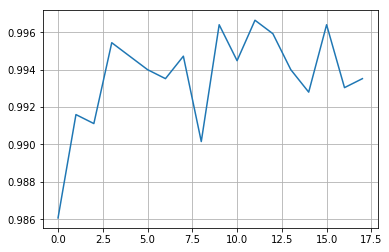

In [564]:
tm_recalc_phase_one.data.speaker_recognition_acc_eval.plot()
plt.grid(True)

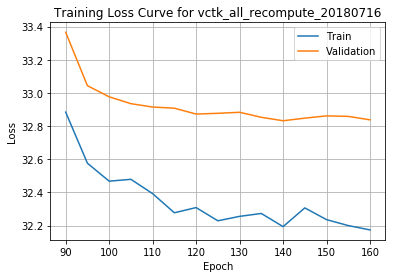

In [566]:
# TrainingMonitor for second phase of training
tm_recalc_phase_two = tm.TrainingMonitor('vctk_all_2_v2_recompute_20180716.csv', exp_name='vctk_all_recompute_20180716', path="training_logs")
tm_recalc_phase_two.read()
tm_recalc_phase_two.plot_loss()

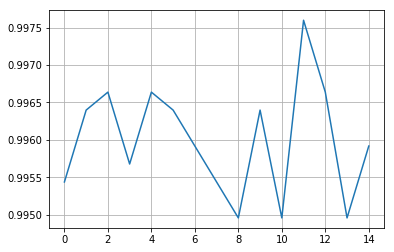

In [567]:
tm_recalc_phase_two.data.speaker_recognition_acc_eval.plot()
plt.grid(True)

In [569]:
# first manual attempt at combining the two stages into a single TrainingMonitor object
tm_recalc_combo = tm_recalc_phase_one.combine(tm_recalc_phase_two, 'vctk-all-recalc-combo')

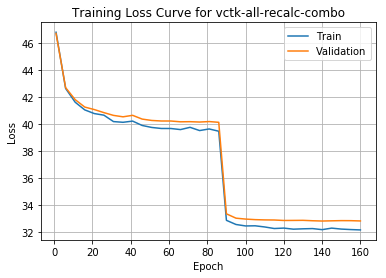

In [570]:
tm_recalc_combo.plot_loss()

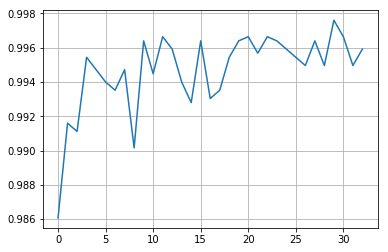

In [571]:
tm_recalc_combo.data.speaker_recognition_acc_eval.plot()
plt.grid(True)

### Recomputing vckt-all curves
* Overnight 16-Jul-18
* More detailed evaluation objectives
* With and without teacher forcing/noise

In [572]:
# run with teacher forcing and training noise as in training
tm_recalc_combo_TT = tm.TrainingMonitor('vctk_all_2_v2_20180716_teachT_noiseT.csv', exp_name='vctk_all_20180716_teachT_noiseT', path="training_logs",
                                        source_file=('vctk_all_20180716_teachT_noiseT.csv', 'vctk_all_2_v2_20180716_teachT_noiseT.csv'))

* Interesting that speaker recognition accuracy is so high after one epoch! The speech isn't intelligible at that point, so clearly the classification model is picking up on things that aren't quite the same as the human ear. Also note that the teacher forcing helps a great deal because it enforces speech rate etc. that might be characteristic of the speaker

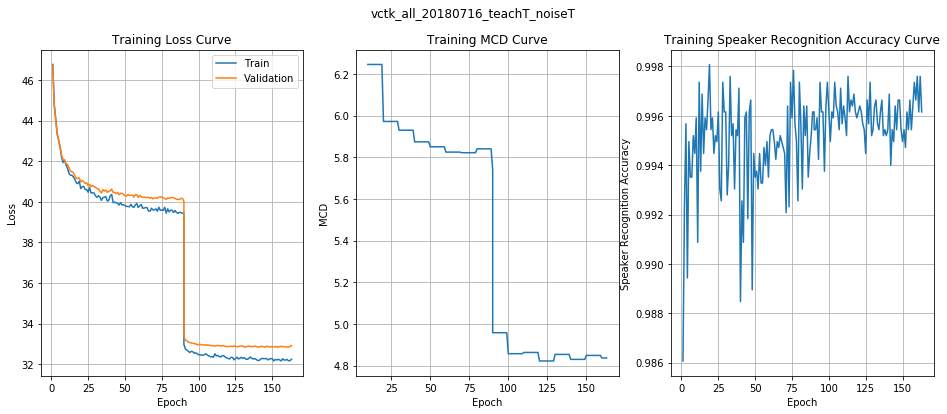

In [576]:
tm_recalc_combo_TT.plot()

In [573]:
# run 'free': no teacher forcing, no noise
tm_recalc_combo_FF = tm.TrainingMonitor('vctk_all_2_v2_20180716_teachF_noiseF.csv', exp_name='vctk_all_20180716_teachT_noiseT', path="training_logs",
                                        source_file=('vctk_all_20180716_teachF_noiseF.csv', 'vctk_all_2_v2_20180716_teachF_noiseF.csv'))

* Now that teacher forcing has been removed, the loss figures don't mean so much.
* Could try DTW in the loss calc but not sure if this is going to help much
* Results were generally improving during the first stage of training, but get worse in the second stage -
* Results get worse in the second stage, when we add noise and increase the sequence length. Model is able to deviate from ground truth more, but it might still be creating a more natural and/or intelligible sample
* Need to do a kind of manual MOS testing where I play myself random samples from the validation set and rate them on intelligibility, naturalness etc. Can do this over a number of epochs and compare results


* Obviously need the attention breakdown metric too!

* TODO: also create plots with teacher forcing=T and noise=0 so we can compare the losses between the two stages of training. Not a hugely meaningful metric (model is being judged on how well it can predict t+1 given correct t, not on how well it can reconstruct a whole sequence) but it does mean something and can tell us if the second stage of training helps at all
* also try a third stage of training with noise 1? See if it does anything... Jiameng didn't seem to think it would get too much better

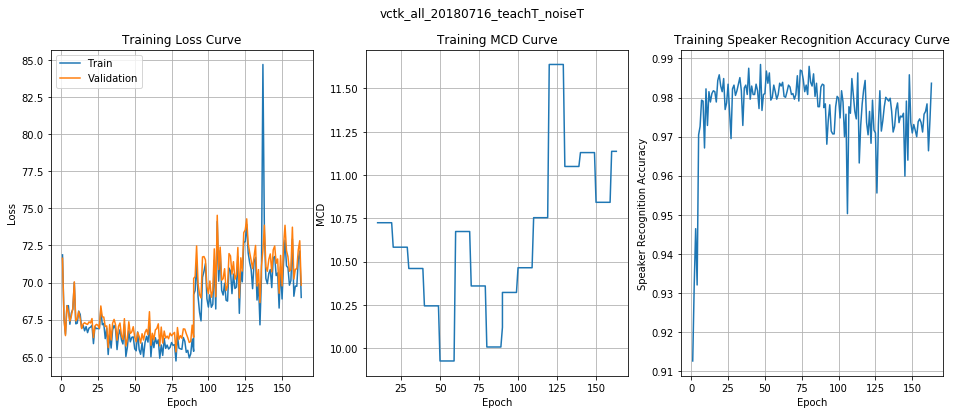

In [574]:
tm_recalc_combo_FF.plot()

In [523]:
l = tm.LossDecomposition(tm_recalc_combo_FF)

In [524]:
out = l.get_loss_by_feature()

Done 10
Done 20
Done 30
Done 40
Done 50
Done 60
Done 70
Done 80
Done 90
Done 90
Done 100
Done 110
Done 120


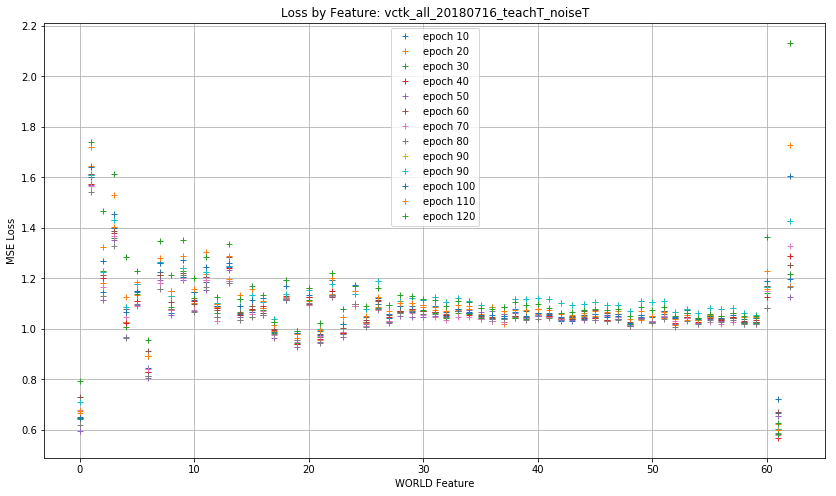

In [525]:
l.plot_loss_by_feature()

In [238]:
lc10 = l.get_loss_contrib(epoch=10)
lc20 = l.get_loss_contrib(epoch=20)

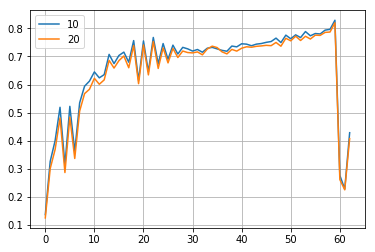

41.8855
40.9818


In [240]:
plt.plot(lc10.sum((0,1)))
plt.plot(lc20.sum((0,1)))
plt.grid(True)
plt.legend(('10', '20'))
plt.show()
print lc10.sum()
print lc20.sum()

### Fader Networks

* Data below is for my attempt to run the fader networks code in 'rec mode' i.e. using only the MSE reconstruction loss, to check that the result is the same as this baseline version
* The results in the table look fine
* After this point I switched to a new notebook: fader_networks_recreate_baseline_20180718
* This new notebook runs in the fader-networks branch and directly compares the 'recreate_baseline' sim to my original sim.

In [546]:
tm_fader = tm.TrainingMonitor('fader_recreate_baseline_20180717.csv', exp_name='fader_recreate', path="/home/ubuntu/msc-project-fader-networks/training_logs")

In [547]:
tm_fader.disp()

,epoch,update_time,train_loss,valid_loss,mcd
0,1,17-Jul-2018 22:27:42,46.874615,46.870501,NaN
1,2,17-Jul-2018 23:07:25,45.173688,45.071808,NaN
2,3,17-Jul-2018 23:46:50,44.379312,44.398527,NaN
3,4,18-Jul-2018 00:26:35,43.712355,43.834969,NaN
4,5,18-Jul-2018 01:06:16,43.014415,43.162271,NaN
5,6,18-Jul-2018 01:46:07,42.613459,42.680082,NaN
6,7,18-Jul-2018 02:25:49,42.291384,42.356839,NaN
7,8,18-Jul-2018 03:05:38,42.265152,42.366359,NaN
8,9,18-Jul-2018 03:45:14,42.063568,42.163550,NaN
9,10,18-Jul-2018 04:24:40,41.735078,41.854727,NaN


#### Evaluate Old Model

*** !!! problem - won't load, something must be imcompatible between versions !!! ***

In [159]:
import eval_curves as ec

In [160]:
tst = ec.calc_eval_curves(checkpoint_folder='/home/ubuntu/loop/checkpoints/vctk-16khz-cmu-no-boundaries-all-noise-2',
                  checkpoint_file='bestmodel.pth',
                     data='/home/ubuntu/loop/data/vctk-16khz-cmu-no-boundaries-all',
                     speaker_recognition_checkpoint='checkpoints/speaker_recognition_vctk_all/bestmodel.pth',
                     speaker_recognition_exp_name='notebook_test',
                     exp_name='vckt_all_original',
                     max_seq_len=1000,
                     nspk=107,
                     gpu=0,
                     batch_size=64,
                     seed=1,
                     eval_epochs=20,
                     b_teacher_force=True,
                     b_use_train_noise=True
                     )

/usr/local/lib/python2.7/dist-packages/torch/backends/cudnn/__init__.py:48: UserWarning: PyTorch was compiled without cuDNN support. To use cuDNN, rebuild PyTorch making sure the library is visible to the build system.
  "PyTorch was compiled without cuDNN support. To use cuDNN, rebuild "
Valid epoch 1:   0%|          | 0/68 [00:00<?, ?it/s]

RuntimeError: The size of tensor a (62) must match the size of tensor b (32) at non-singleton dimension 0